In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd
import seaborn as sns # type: ignore

In this lab you will use data from a survey done during the swine flu (H1N1) scare of 2009-2010 to see how demographcs and opinions affected the likelihood of getting the H1N1 vaccine.

## 1.
Import the `h1n1.csv` file. Drop all rows that have a missing value. Let `y` be the column *h1n1_vaccine*, and let `X` be the result of conversion to dummy variables of all the other columns. Use `drop_first=True` in the dummy conversion.

In [2]:
X = None
y = None

df = pd.read_csv("h1n1.csv")

df = df.dropna()

y = df['h1n1_vaccine']

X = pd.get_dummies(df.drop(columns=['h1n1_vaccine']), drop_first=True)

In [3]:
X

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",income_poverty_Below Poverty,marital_status_Not Married,rent_or_own_Rent
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,False,False,False,False,True,False,False,True,True,False
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,False,False,False,False,True,True,False,True,True,True
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,True,True,True
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,False,True,False,False,True,False,False,False,False,False
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,False,False,False,False,True,False,True,False,False,False
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,True,False,False,False,True,False,True,False,True,True
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,True,False,False,True,False,False,False,True,False
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,True,False,False,False,True,True,False,False,True,True


In [5]:
# TESTS
assert X.shape == (19682, 37), "X has the wrong shape"
assert y.sum() == 4521, "y has the wrong values"
print("OK")

OK


## 2.
(4.1) The code below defines a function `learn_curve(model, X, y)` that plots learning curves of precision for a given classifier and dataset. Use it to make learning curves for two decision trees, one with maximum depth 5 and the other with maximum depth 9.

The differences between the plots show clearly that the deeper tree is overfitting; i.e., more data would be needed to make the training match the testing.

In [4]:
# Do not edit this cell
from sklearn.model_selection import LearningCurveDisplay, StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=302)
def learn_curve(model, X, y):
    return LearningCurveDisplay.from_estimator(
    model, X, y,
    random_state=302,
    train_sizes=np.linspace(0.1, 1, 12),
    cv=cv,
    score_name="Precision",
    scoring="precision",
    score_type="both",    # training and testing scores
    n_jobs=-1             # use all processors
    )


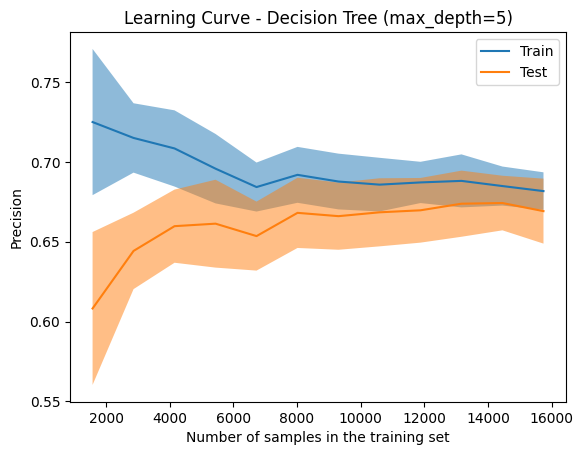

In [6]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=302)
learn_curve(model_depth_5, X, y)
plt.title("Learning Curve - Decision Tree (max_depth=5)")
plt.show()

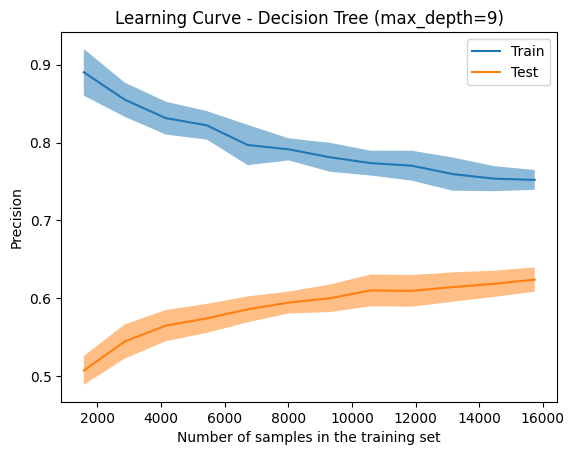

In [7]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
model_depth_9 = DecisionTreeClassifier(max_depth=9, random_state=302)
learn_curve(model_depth_9, X, y)
plt.title("Learning Curve - Decision Tree (max_depth=9)")
plt.show()

## 3.

(4.1) Split the dataset 80% / 20% into training and test subsets, using `19716` as the starting random state. Let `tree` be a decision tree classifier with maximum depth 9 (the overfit situation above) and train it using the training subset. Finally, compute its balanced accuracy score on the test set.

In [11]:
tree = None
tree_score = None

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=19716, stratify=y)

tree = DecisionTreeClassifier(max_depth=9, random_state=19716)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
tree_score = balanced_accuracy_score(y_test, y_pred)


In [12]:
print(f"Tree balanced accuracy is {tree_score:.2%}")

Tree balanced accuracy is 69.01%


In [13]:
# TESTS
assert type(tree) == DecisionTreeClassifier, "tree must be a DT classifier"
assert tree.n_classes_ == 2, "tree must be trained to 2 classes"
assert 0.65 < tree_score < 0.7, "incorrect score for the tree"
print("OK")


OK


## 4.

(4.3) Repeat step 3 for a random forest consisting of 100 trees with maximum depth 9 and maximum samples and features set to 50%. Use `3383` as the random state for the forest.

In [19]:
forest = None
forest_score = None
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=19716, stratify=y)

forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=9,
    max_samples=0.5,
    max_features=0.5,
    random_state=3383
)
forest.fit(X_train, y_train)

forest_pred = forest.predict(X_test)
forest_score = balanced_accuracy_score(y_test, forest_pred)
print(f"Forest balanced accuracy is {forest_score:.4f}")

Forest balanced accuracy is 0.6999


In [15]:
print(f"Forest balanced accuracy is {forest_score:.2%}")

Forest balanced accuracy is 69.99%


In [21]:
# TESTS
assert type(forest) == RandomForestClassifier, "forest must be a RF classifier"
assert forest.n_classes_ == 2, "forest must be trained to 2 classes"
assert 0.7 < forest_score < 0.75, "incorrect score for the forest"
print("OK")


AssertionError: incorrect score for the forest

## 5.

(4.3) Make ROC plots for the `tree` and `forest` classifiers on the test data.

The forest's curve should be better than the tree's.

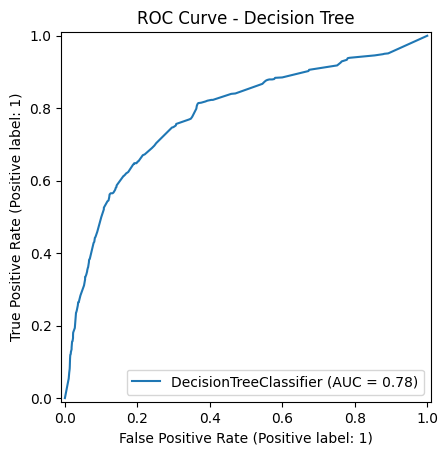

In [22]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(tree, X_test, y_test)
plt.title("ROC Curve - Decision Tree")
plt.show()

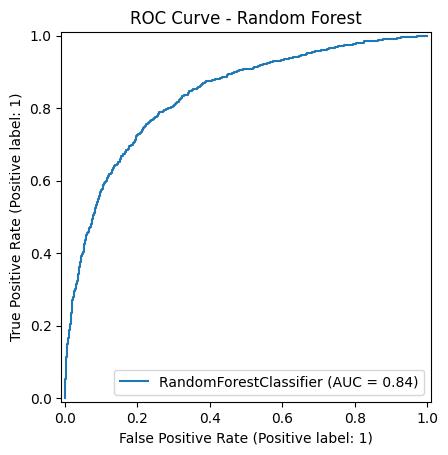

In [23]:
RocCurveDisplay.from_estimator(forest, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

## 6.
(4.4) Using a stratified k-fold with 5 splits and random state `302`, find cross-validation scores for the `forest` using all the data (not just test or train). They should be fairly uniform.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=302)

forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=9,
    max_samples=0.5,
    max_features=0.5,
    random_state=3383
)

scores = cross_validate(
    forest, X, y,
    cv=cv,
    scoring='balanced_accuracy',
    return_train_score=False,
    n_jobs=-1
)

In [27]:
print("Validation scores:")
print( scores["test_score"] )

Validation scores:
[0.7147214  0.71539782 0.70932327 0.70805216 0.70185134]


In [28]:
# TESTS
assert type(scores) == dict, "Result should be a dictionary"
assert (0.7 < scores["test_score"]).all(), "Some scores are too small"
assert (0.75 > scores["test_score"]).all(), "Some scores are too big"
print("OK")


OK
